In [1]:
# for colab run
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/projeto/automl-dynamic-search-space/meta-level-analysis/")

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/projeto/automl-dynamic-search-space/meta-level-analysis/'

# Imports

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# COLORS = ["#333333", "#999ea2", "#6fa2d0", "#4d759a", "#073763"][::-1]
# COLORS = ["#1B262C", "#0F4C75", "#3282B8", "#BBE1FA"]
COLORS = ["#000057", "#4d759a", "#3282B8",  "#999ea2", "#4f4f4f", "#1B262C"]

MY_PALLETE = sns.color_palette("colorblind")
sns.set_palette(MY_PALLETE)

In [ ]:

MY_PALLETE

# Data

In [ ]:
df = pd.read_csv("../pipeline_experiment_result.csv")
df

In [ ]:
df.shape

In [ ]:
df.columns.to_list()

In [ ]:
mask = df["dataset"] == "dataset_1161"
df[mask]

In [ ]:
df["status"].value_counts()

## Meta Evaluation

In [ ]:
df_mtf = pd.read_csv("meta_feature_dataset.csv")

In [ ]:
df_mtf

In [ ]:
# meta-target

pipelines = df["classifier:__choice__"]+" + "+df["feature_preprocessor:__choice__"]
dfs = df \
    .assign(pipelines=pipelines) \
    .rename(columns={"classifier:__choice__": "classifier", "feature_preprocessor:__choice__": "preprocessor"})
dfs

measures = [
"f1_weighted_test",
"balanced_accuracy_test",
]

dfagg = dfs \
    .groupby(["dataset", "classifier", "preprocessor"])[measures] \
    .agg(f1_weighted_test_median = ("f1_weighted_test", "median")) \
    .reset_index()
dfagg

In [ ]:
FEATURES = [
 'attr_concmean',
 'attr_concsd',
 'attr_entmean',
 'attr_entsd',
 'attr_to_inst',
 'best_nodemean',
 'best_nodesd',
 'can_cormean',
 'can_corsd',
 'cat_to_num',
 'class_concmean',
 'class_concsd',
 'class_ent',
 'cormean',
 'corsd',
 'covmean',
 'covsd',
 'eigenvaluesmean',
 'eigenvaluessd',
 'elite_nnmean',
 'elite_nnsd',
 'eq_num_attr',
 'freq_classmean',
 'freq_classsd',
 'g_meanmean',
 'g_meansd',
 'gravity',
 'h_meanmean',
 'h_meansd',
 'inst_to_attr',
 'iq_rangemean',
 'iq_rangesd',
 'joint_entmean',
 'joint_entsd',
 'kurtosismean',
 'kurtosissd',
 'leaves',
 'leaves_branchmean',
 'leaves_branchsd',
 'leaves_corrobmean',
 'leaves_corrobsd',
 'leaves_homomean',
 'leaves_homosd',
 'leaves_per_classmean',
 'leaves_per_classsd',
 'lh_trace',
 'linear_discrmean',
 'linear_discrsd',
 'madmean',
 'madsd',
 'maxmean',
 'maxsd',
 'meanmean',
 'meansd',
 'medianmean',
 'mediansd',
 'minmean',
 'minsd',
 'mut_infmean',
 'mut_infsd',
 'naive_bayesmean',
 'naive_bayessd',
 'nodes',
 'nodes_per_attr',
 'nodes_per_inst',
 'nodes_per_levelmean',
 'nodes_per_levelsd',
 'nodes_repeatedmean',
 'nodes_repeatedsd',
 'nr_attr',
 'nr_bin',
 'nr_cat',
 'nr_class',
 'nr_cor_attr',
 'nr_disc',
 'nr_inst',
 'nr_norm',
 'nr_num',
 'nr_outliers',
 'ns_ratio',
 'num_to_cat',
 'one_nnmean',
 'one_nnsd',
 'p_trace',
 'random_nodemean',
 'random_nodesd',
 'rangemean',
 'rangesd',
 'roy_root',
 'sdmean',
 'sdsd',
 'sd_ratio',
 'skewnessmean',
 'skewnesssd',
 'sparsitymean',
 'sparsitysd',
 't_meanmean',
 't_meansd',
 'tree_depthmean',
 'tree_depthsd',
 'tree_imbalancemean',
 'tree_imbalancesd',
 'tree_shapemean',
 'tree_shapesd',
 'varmean',
 'varsd',
 'var_importancemean',
 'var_importancesd',
 'w_lambda',
 'worst_nodemean',
 'worst_nodesd',
 'classifier-num',
 'preprocessor-num',
 'cl_min_perf',
 'cl_max_perf',
 'cl_median_perf',
 'cl_mean_perf',
 'cl_std_perf',
 'pr_min_perf',
 'pr_max_perf',
 'pr_median_perf',
 'pr_mean_perf',
 'pr_std_perf',
 'p_min_perf',
 'p_max_perf',
 'p_median_perf',
 'p_mean_perf',
 'p_std_perf'
]

In [2]:
minn = -1e10
maxx = 1e10

data = pd.merge(dfagg, df_mtf, on=["dataset"])
data.fillna(0.0, inplace=True)
data.replace([np.inf], maxx, inplace=True)
data.replace([-np.inf], minn, inplace=True)

import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

Xset = data["dataset"].unique()

print([(i,j) for i, j in enumerate(data["classifier"].astype("category").cat.categories)])
print()
print([(i,j) for i, j in enumerate(data["preprocessor"].astype("category").cat.categories)])
print()


# data["classifier"] = data["classifier"]
# data["preprocessor"] = data["preprocessor"]

data["classifier-num"] = data["classifier"].astype("category").cat.codes
data["preprocessor-num"] = data["preprocessor"].astype("category").cat.codes
# data["feature_preprocessor__choice__"] = data["feature_preprocessor__choice__"].astype("category").cat.codes

target = "f1_weighted_test_median"
to_delete = ["dataset", "classifier", "preprocessor", target]


from sklearn.model_selection import train_test_split
Xtr, Xte = train_test_split(Xset, test_size=0.20, random_state=42)

cl_mean_perf_feature = data[data["dataset"].isin(Xtr)] \
    .groupby(["classifier"]) \
    .agg(
        cl_min_perf=("f1_weighted_test_median", "min"),
        cl_max_perf=("f1_weighted_test_median", "max"),
        cl_median_perf=("f1_weighted_test_median", "median"),
        cl_mean_perf=("f1_weighted_test_median", "mean"),
        cl_std_perf=("f1_weighted_test_median", "std")
    )

pr_mean_perf_feature = data[data["dataset"].isin(Xtr)] \
    .groupby(["preprocessor"]) \
    .agg(
        pr_min_perf=("f1_weighted_test_median", "min"),
        pr_max_perf=("f1_weighted_test_median", "max"),
        pr_median_perf=("f1_weighted_test_median", "median"),
        pr_mean_perf=("f1_weighted_test_median", "mean"),
        pr_std_perf=("f1_weighted_test_median", "std")
    )

p_mean_perf_feature = data[data["dataset"].isin(Xtr)] \
    .groupby(["classifier", "preprocessor"]) \
    .agg(
        p_min_perf=("f1_weighted_test_median", "min"),
        p_max_perf=("f1_weighted_test_median", "max"),
        p_median_perf=("f1_weighted_test_median", "median"),
        p_mean_perf=("f1_weighted_test_median", "mean"),
        p_std_perf=("f1_weighted_test_median", "std")
    )

X_train = data[data["dataset"].isin(Xtr)] \
    .merge(cl_mean_perf_feature, on="classifier", how="left") \
    .merge(pr_mean_perf_feature, on="preprocessor", how="left") \
    .merge(p_mean_perf_feature, on=["classifier", "preprocessor"], how="left") \
    # .drop(columns=to_delete)

X_test = data[data["dataset"].isin(Xte)] \
    .merge(cl_mean_perf_feature, on="classifier", how="left") \
    .merge(pr_mean_perf_feature, on="preprocessor", how="left") \
    .merge(p_mean_perf_feature, on=["classifier", "preprocessor"], how="left") \
    # .drop(columns=to_delete)

y_train = X_train[target]
y_test = X_test[target]

NameError: name 'pd' is not defined

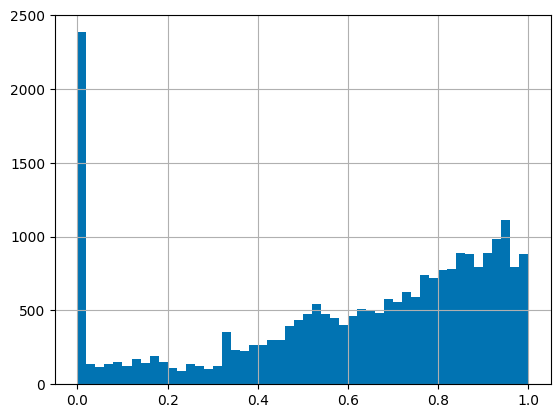

In [ ]:
y_train.hist(bins=50)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

# X_train = X_train.astype(float)
# X_test = X_test.astype(float)
# y_train = y_train.astype(float)
# y_test = y_test.astype(float)

regr = RandomForestRegressor(random_state=42, n_jobs=4)
regr.fit(X_train[FEATURES], y_train)
y_pred = regr.predict(X_test[FEATURES])

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(r2)
print(mse)
print(rmse)

0.7957015560682672
0.01875595427154549


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import r2_score, mean_squared_error

# X_train = X_train.astype(float)
# X_test = X_test.astype(float)
# y_train = y_train.astype(float)
# y_test = y_test.astype(float)

# regr = GradientBoostingRegressor(random_state=42)
# regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)

# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# print(r2)
# print(mse)

In [ ]:
import time
import numpy as np

forest = regr
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.093 seconds


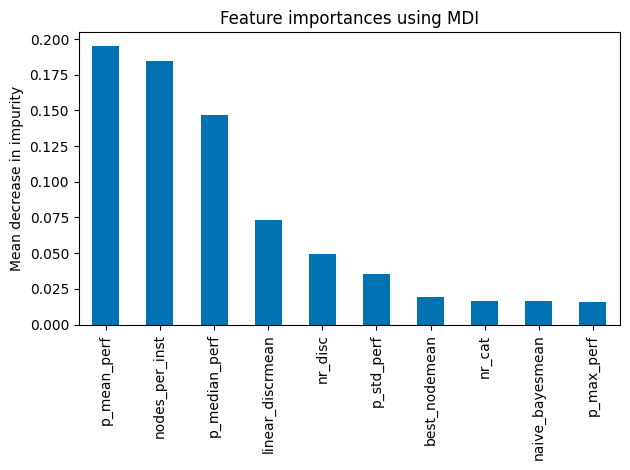

In [ ]:
import pandas as pd

n_features = 10
idx = np.argsort(importances)[::-1][0:n_features]
feature_names = X_train[FEATURES].columns.to_numpy()

forest_importances = pd.Series(importances[idx], index=feature_names[idx])

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
start = 0
end = 0.1
step = 0.1

r = pd.DataFrame({"prediction":y_pred, "test": y_test, "label": len(y_test)*[""]})

for i in range(10):
    mask = (y_test >= start) & (y_test <= end)
    r.loc[mask, "label"] = f"[{start}, {end}]"

    start = round(start+step, 1)
    end = round(end+step, 1)

r

,prediction,test,label
0,0.944261,0.992797,"[0.9, 1.0]"
1,0.929931,0.992851,"[0.9, 1.0]"
2,0.952906,0.991775,"[0.9, 1.0]"
3,0.930592,0.992847,"[0.9, 1.0]"
4,0.929137,0.995281,"[0.9, 1.0]"
...,...,...,...
6137,0.659867,0.553033,"[0.5, 0.6]"
6138,0.448972,0.402051,"[0.4, 0.5]"
6139,0.645851,0.563701,"[0.5, 0.6]"
6140,0.599380,0.563175,"[0.5, 0.6]"


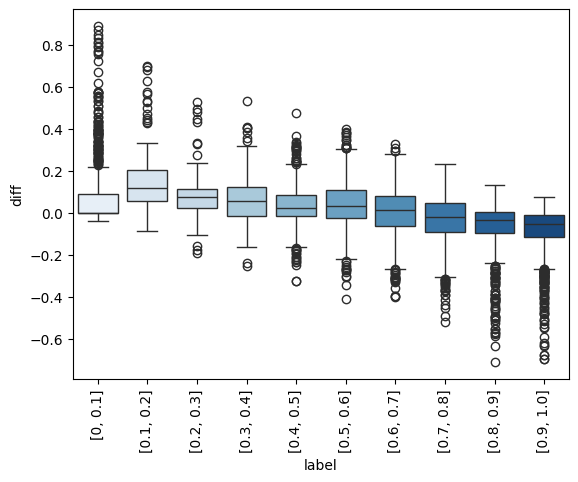

In [ ]:
import seaborn as sns

r.sort_values(by=['label'], inplace=True)
r["diff"] = (r["prediction"] - r["test"])
sns.boxplot(data=r, x="label", y="diff", palette="Blues")
plt.xticks(rotation=90)
plt.show()

## Base Evaluation

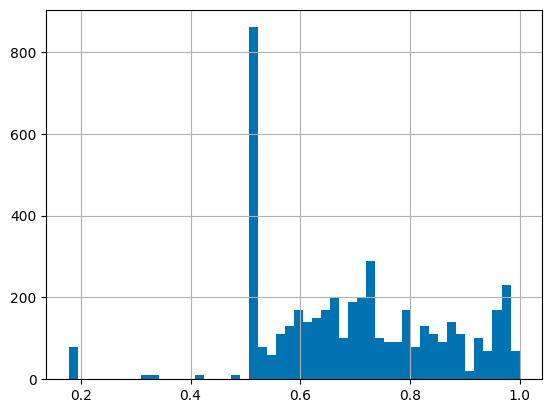

dataset_50
0.9125831698251656
12 10


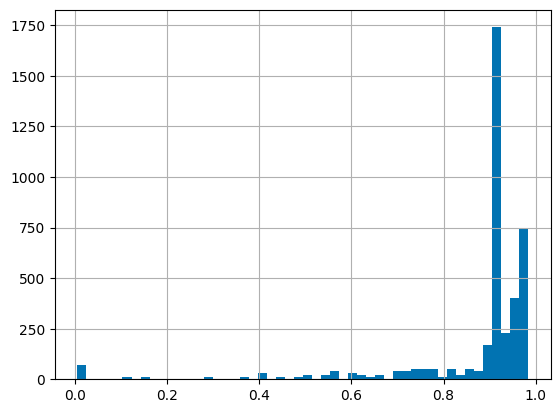

dataset_40983
0.9367807911446486
10 10


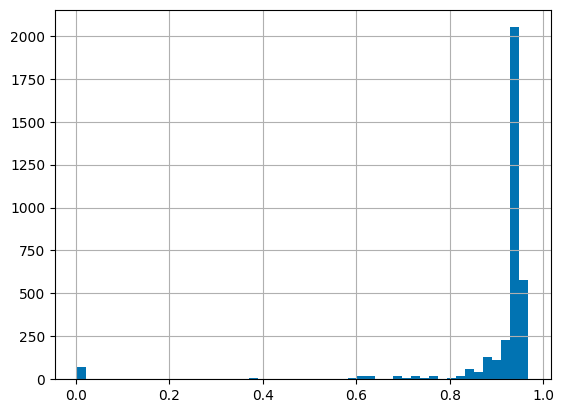

dataset_1142
0.9474675493076233
10 7


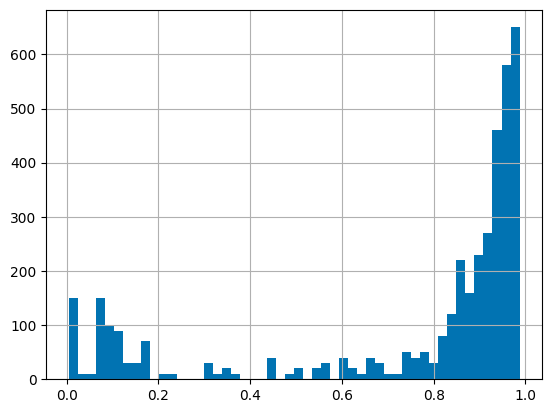

dataset_28
0.8222032524501127
13 11


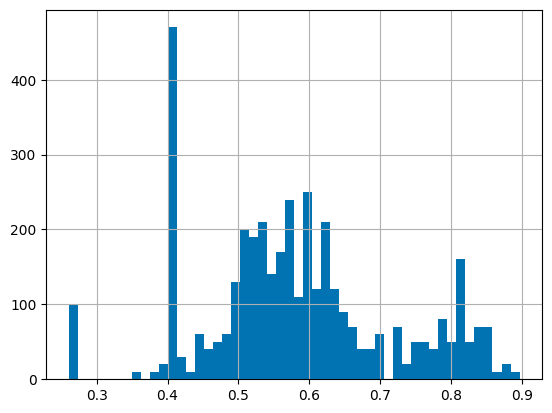

dataset_742
0.7186658172947125
10 8


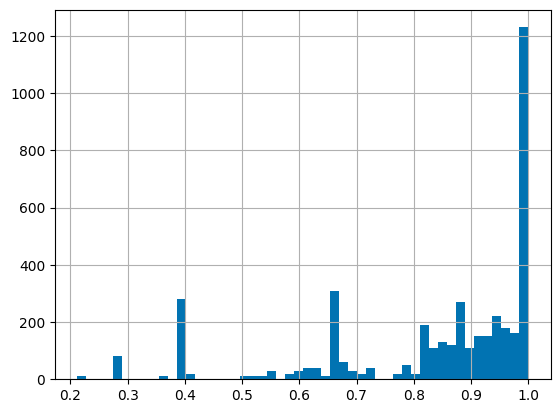

dataset_923
0.9452154827768835
9 10


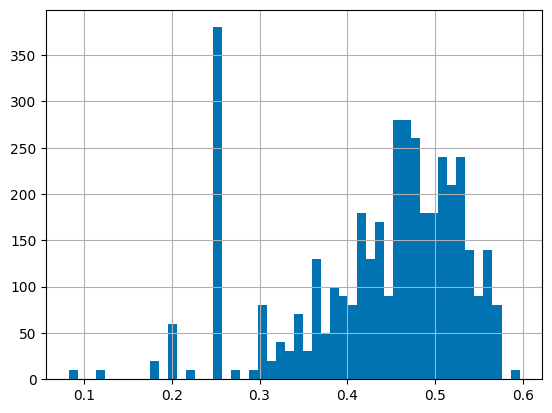

dataset_23
0.4917335585043239
10 10


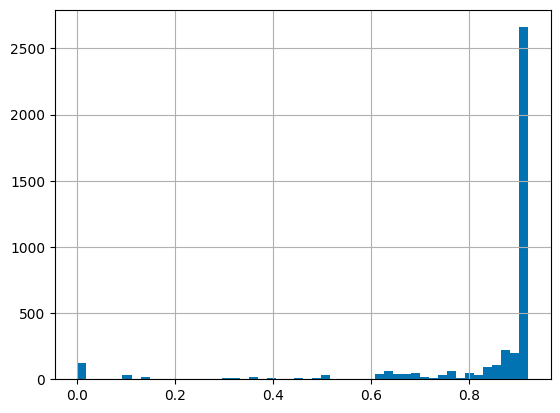

dataset_1541
0.9040282992319426
13 12


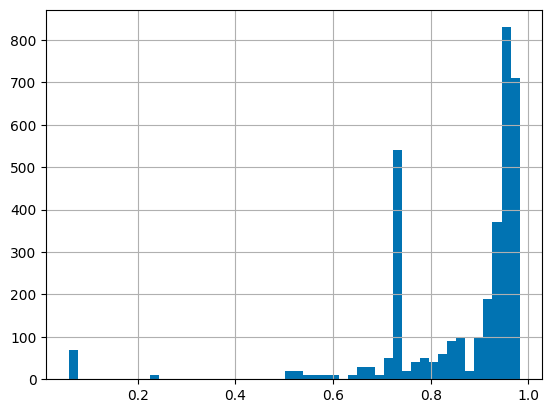

dataset_1161
0.9474951359311106
11 8


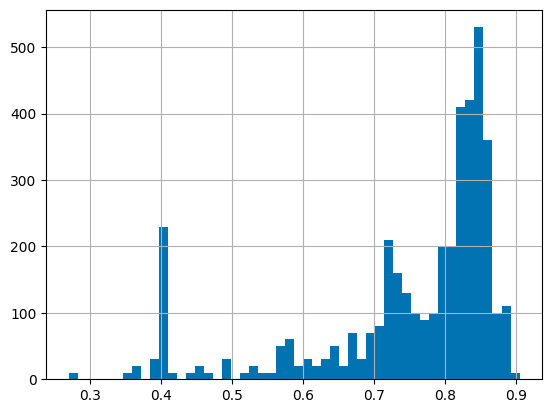

dataset_825
0.7348520655484101
9 9


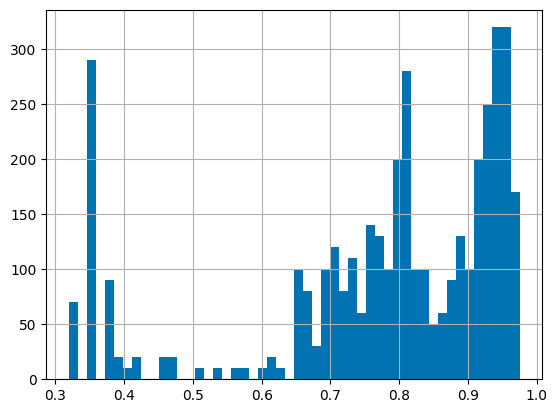

dataset_841
0.7950472339396673
10 9


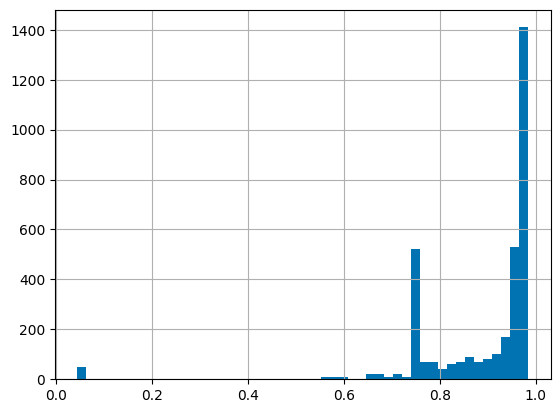

dataset_1134
0.9552140817352764
10 8


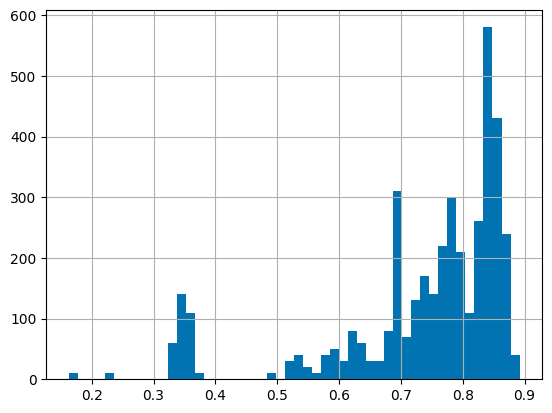

dataset_799
0.794030582299971
11 10


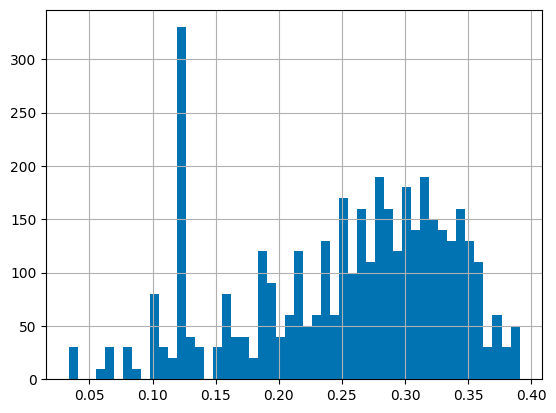

dataset_1552
0.410238370088106
9 11


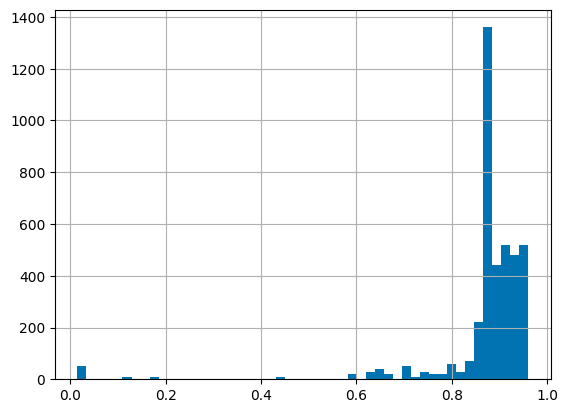

dataset_40994
0.8885618409039538
10 10


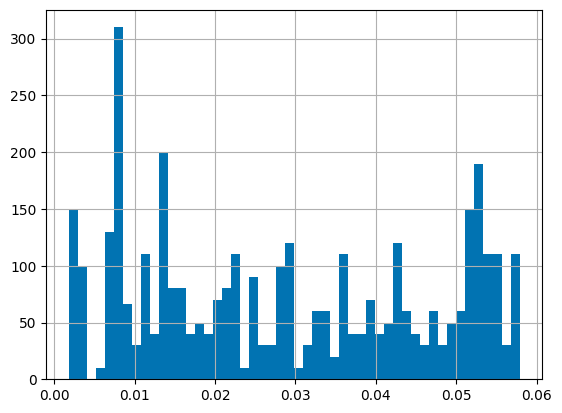

dataset_40985
0.08362004643516724
12 10


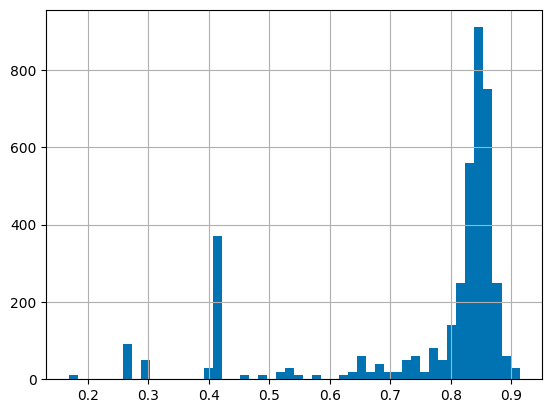

dataset_717
0.7800371502926032
11 9


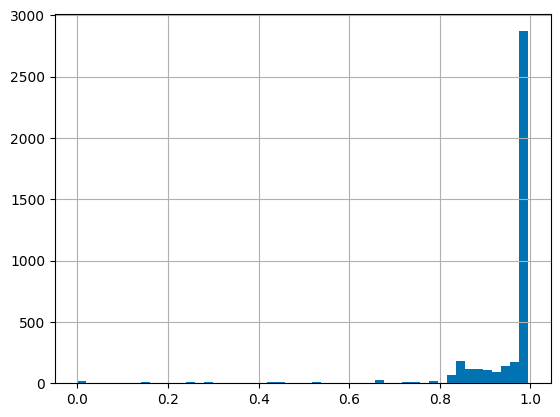

dataset_1069
0.9304219718975514
12 9


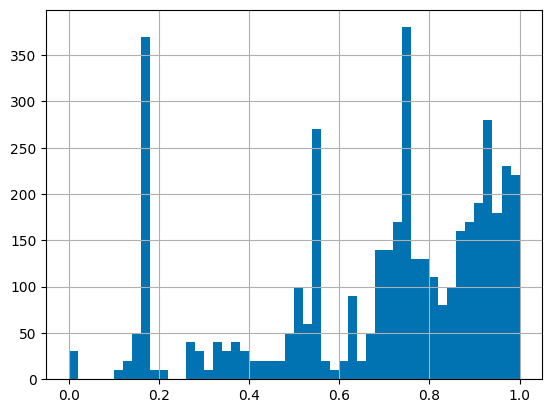

dataset_26
0.7670783520335663
12 11


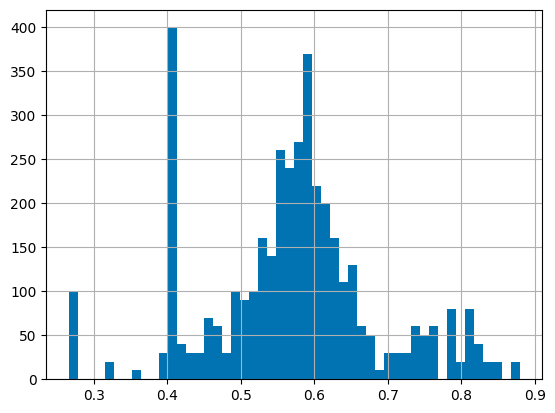

dataset_937
0.6995124752923306
7 8


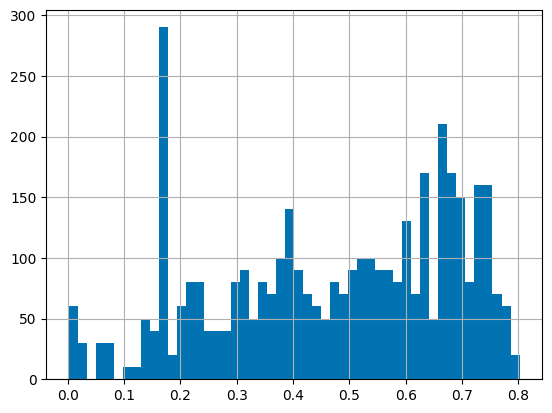

dataset_40982
0.44446420573690565
9 10


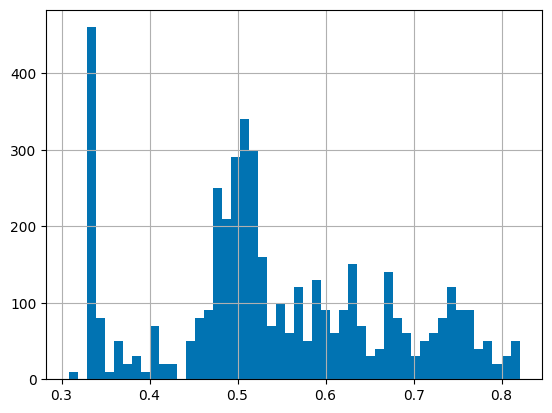

dataset_40647
0.5643922582456206
9 8


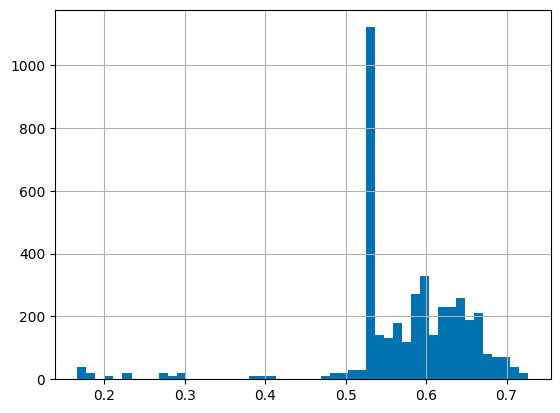

dataset_470
0.6186503253454052
11 11


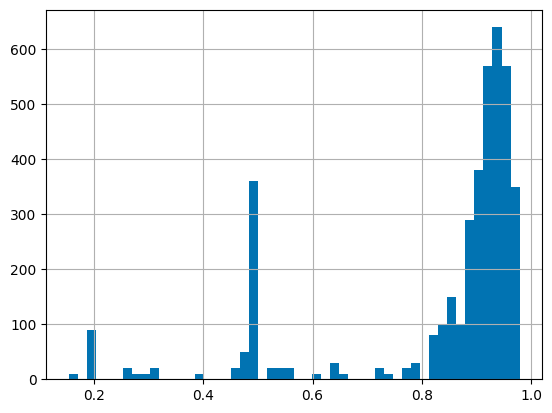

dataset_1510
0.8734055758091227
10 10


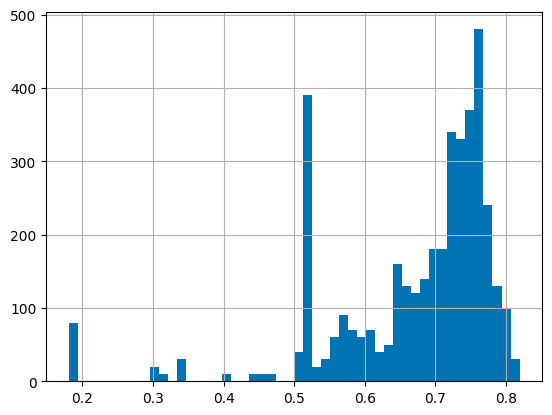

dataset_37
0.6650956837000566
11 11


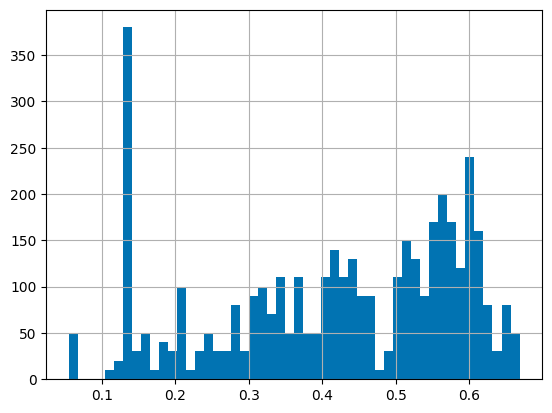

dataset_188
0.4579380227853701
9 9


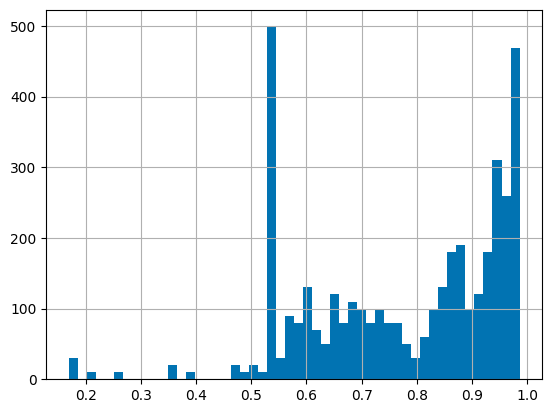

dataset_722
0.9194098556109807
9 9


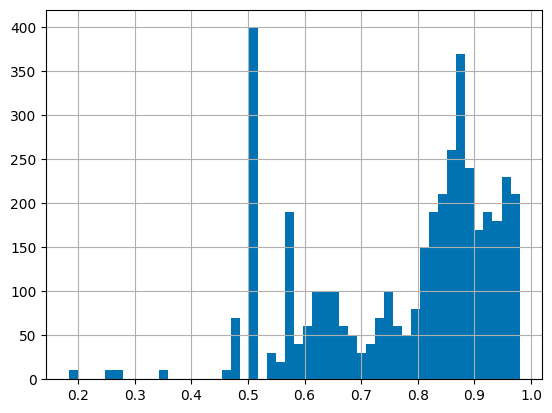

dataset_839
0.7963481690740801
11 9


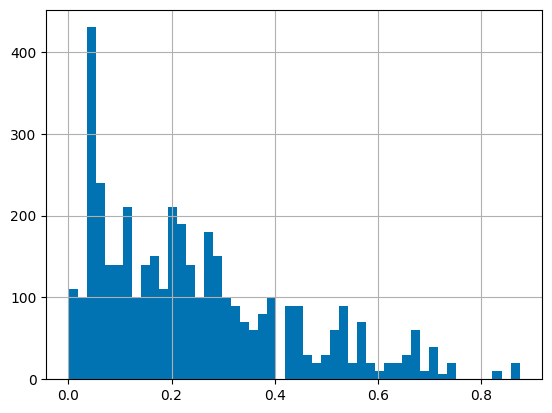

dataset_1481
0.31483750228677504
10 11


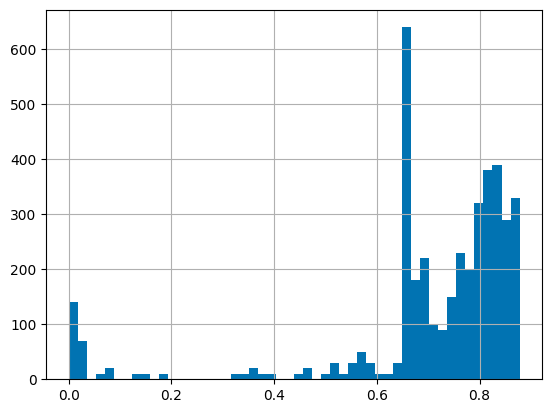

dataset_2
0.7210057589341277
11 11


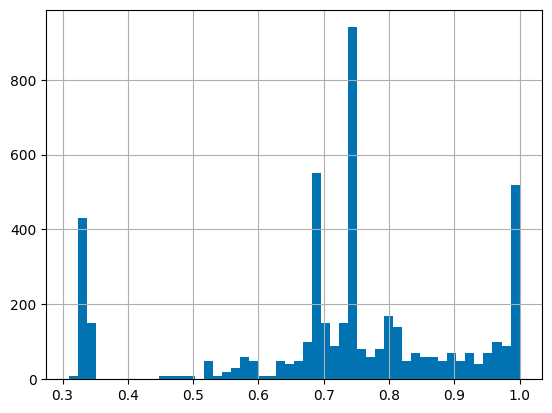

dataset_333
0.7207991563357808
10 9


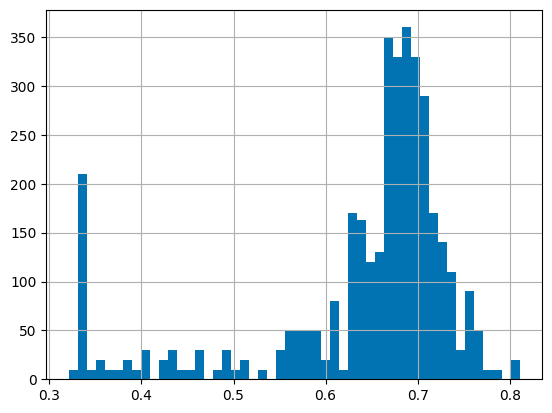

dataset_41145
0.7639705076725991
11 11


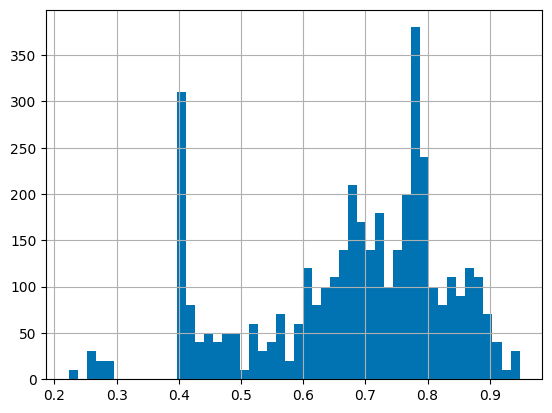

dataset_903
0.730191457695584
8 8


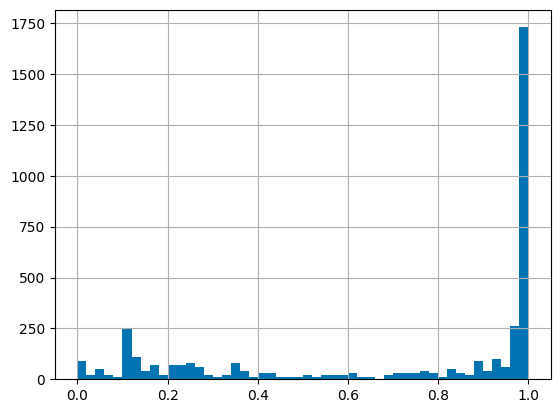

dataset_1466
0.7715558109473437
13 10


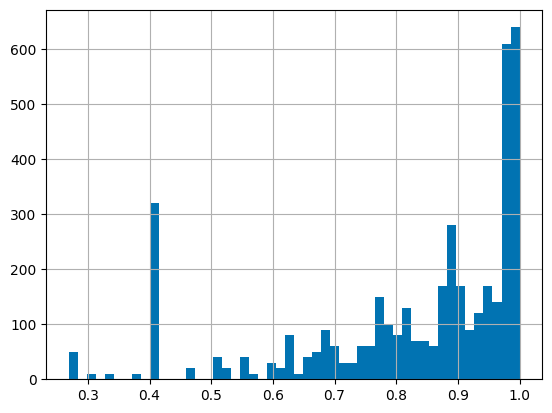

dataset_451
0.9067088673664931
11 9


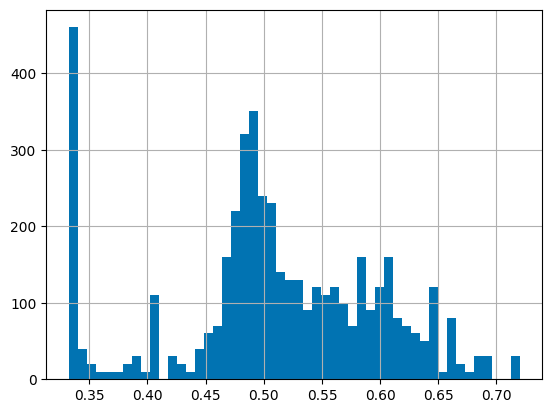

dataset_40649
0.5398798131776238
9 9


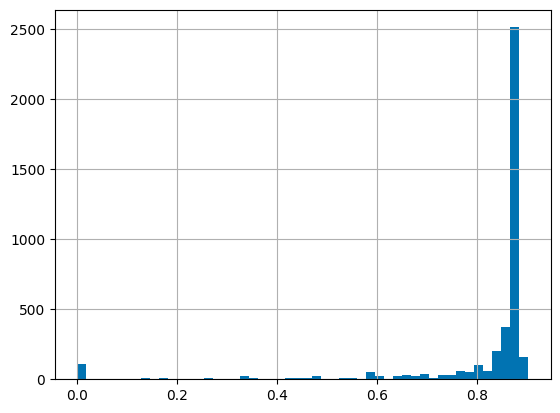

dataset_1542
0.8742502930824504
12 11


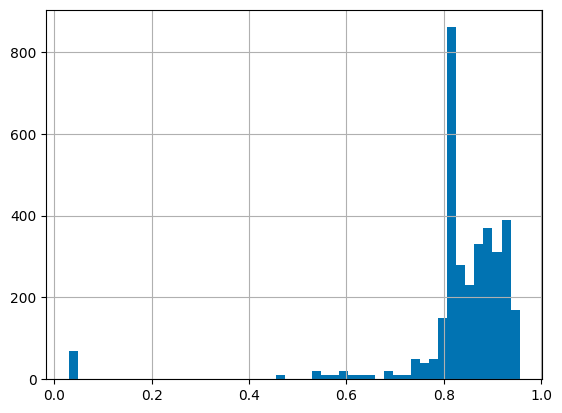

dataset_1166
0.8979550968460689
11 6


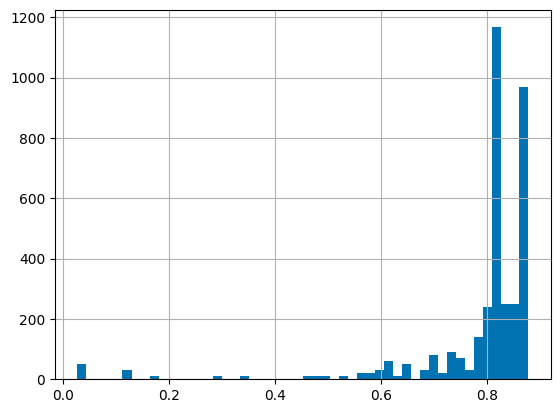

dataset_41162
0.8226730455775187
14 12


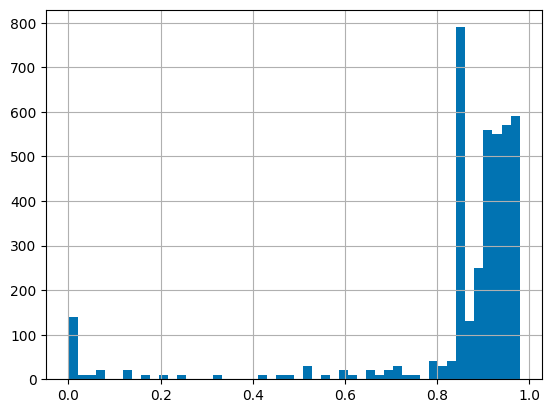

dataset_30
0.7718254900576579
11 11


In [ ]:
cls_len_count, fprep_len_count = [], []
cls_list, fprep_list = [], []
for dt_name in Xte:
    df[df["dataset"] == dt_name]["f1_weighted_test"].hist(bins=50)
    plt.show()

    df_aux = X_test
    df_aux["prediction"] = y_pred
    df_aux["target"] = y_test

    df_aux2 = df_aux
#     median = df_aux2[df_aux2["dataset"] == dt_name]["median"].median()
    median = df_aux2[df_aux2["dataset"] == dt_name]["prediction"].quantile([.75]).iloc[0]
    print(dt_name)
    print(median)


    mask = (df_aux2["dataset"] == dt_name) & (df_aux2["prediction"] >= median)
    cls_l, fprep_l = df_aux2[mask]["classifier"].unique(), df_aux2[mask]["preprocessor"].unique()
    cls_len, fprep_len = len(cls_l), len(fprep_l)
    print(cls_len, fprep_len)

    cls_len_count.append(cls_len)
    fprep_len_count.append(fprep_len)
    cls_list.append(cls_l)
    fprep_list.append(fprep_l)


In [ ]:
cls_len_count_5, fprep_len_count_5 = [], []
cls_list_5, fprep_list_5 = [], []
for dt_name in Xte:
    df_aux = X_test
    df_aux["prediction"] = y_pred
    df_aux["target"] = y_test

    df_aux2 = df_aux
#     median = df_aux2[df_aux2["dataset"] == dt_name]["median"].median()
    median = df_aux[df_aux["dataset"] == dt_name]["prediction"].quantile([.50]).iloc[0]
    print(dt_name)
    print(median)


    mask = (df_aux2["dataset"] == dt_name) & (df_aux2["prediction"] >= median)
    cls_l, fprep_l = df_aux2[mask]["classifier"].unique(), df_aux2[mask]["preprocessor"].unique()
    cls_len, fprep_len = len(cls_l), len(fprep_l)
    print(cls_len, fprep_len)

    cls_len_count_5.append(cls_len)
    fprep_len_count_5.append(fprep_len)
    cls_list_5.append(cls_l)
    fprep_list_5.append(fprep_l)


dataset_50
0.8586079861953719
16 11
dataset_40983
0.9040334880016471
16 11
dataset_1142
0.9182230471985585
14 11
dataset_28
0.7028074221900148
16 12
dataset_742
0.674535296867441
16 11
dataset_923
0.900676088957602
16 12
dataset_23
0.43079370538322714
16 12
dataset_1541
0.8896533042402927
14 12
dataset_1161
0.8920395605368424
14 11
dataset_825
0.6785981087520413
15 11
dataset_841
0.7465588953584819
14 12
dataset_1134
0.9090201459714096
14 11
dataset_799
0.7464041758872891
16 12
dataset_1552
0.35089676605216413
15 12
dataset_40994
0.8581086866154964
15 12
dataset_40985
0.04849980873781422
15 12
dataset_717
0.7471073959166169
16 12
dataset_1069
0.9094733941800486
13 11
dataset_26
0.655383480338283
16 12
dataset_937
0.6591605744042327
16 11
dataset_40982
0.35283338158792565
15 12
dataset_40647
0.5150915525405988
16 11
dataset_470
0.5822056602617924
16 12
dataset_1510
0.8331531856590212
16 11
dataset_37
0.6302643220531159
16 12
dataset_188
0.3680195183749186
16 12
dataset_722
0.86891593851

In [ ]:
cls_len_count_85, fprep_len_count_85 = [], []
cls_list_85, fprep_list_85 = [], []
for dt_name in Xte:
    df_aux = X_test
    df_aux["prediction"] = y_pred
    df_aux["target"] = y_test

    df_aux2 = df_aux
#     median = df_aux2[df_aux2["dataset"] == dt_name]["median"].median()
    median = df_aux2[df_aux2["dataset"] == dt_name]["prediction"].quantile([.85]).iloc[0]
    print(dt_name)
    print(median)


    mask = (df_aux2["dataset"] == dt_name) & (df_aux2["prediction"] >= median)
    cls_l, fprep_l = df_aux2[mask]["classifier"].unique(), df_aux2[mask]["preprocessor"].unique()
    cls_len, fprep_len = len(cls_l), len(fprep_l)
    print(cls_len, fprep_len)

    cls_len_count_85.append(cls_len)
    fprep_len_count_85.append(fprep_len)
    cls_list_85.append(cls_l)
    fprep_list_85.append(fprep_l)


dataset_50
0.9303630589202697
7 8
dataset_40983
0.9504156084131683
7 8
dataset_1142
0.9562283246586742
7 7
dataset_28
0.8610428933969336
9 10
dataset_742
0.7587583951483267
5 7
dataset_923
0.9635394268197742
7 9
dataset_23
0.5114809070849883
8 7
dataset_1541
0.9076293154454999
10 11
dataset_1161
0.9555877764490609
8 6
dataset_825
0.7693789918795023
8 8
dataset_841
0.8317370165950134
8 9
dataset_1134
0.9680643032936199
7 6
dataset_799
0.8104734102511596
7 7
dataset_1552
0.4346579933684508
8 7
dataset_40994
0.9041488423088577
8 7
dataset_40985
0.10686246848933356
6 10
dataset_717
0.7953525540895836
7 8
dataset_1069
0.936216031092663
7 8
dataset_26
0.8154975658103346
8 8
dataset_937
0.7441790716629635
5 8
dataset_40982
0.477492788757353
6 8
dataset_40647
0.5868059962090388
7 7
dataset_470
0.6375645893470708
9 9
dataset_1510
0.89614468558375
7 8
dataset_37
0.6843920895447614
9 8
dataset_188
0.4955062980062922
8 7
dataset_722
0.9317405294406474
7 9
dataset_839
0.8393494767212606
7 9
dataset

In [ ]:

cls_len_count_95, fprep_len_count_95 = [], []
cls_list_95, fprep_list_95 = [], []
for dt_name in Xte:
    df_aux = X_test
    df_aux["prediction"] = y_pred
    df_aux["target"] = y_test

    df_aux2 = df_aux
#     median = df_aux2[df_aux2["dataset"] == dt_name]["median"].median()
    median = df_aux2[df_aux2["dataset"] == dt_name]["prediction"].quantile([.95]).iloc[0]
    print(dt_name)
    print(median)


    mask = (df_aux2["dataset"] == dt_name) & (df_aux2["prediction"] >= median)
    cls_l, fprep_l = df_aux2[mask]["classifier"].unique(), df_aux2[mask]["preprocessor"].unique()
    cls_len, fprep_len = len(cls_l), len(fprep_l)
    print(cls_len, fprep_len)

    cls_len_count_95.append(cls_len)
    fprep_len_count_95.append(fprep_len)
    cls_list_95.append(cls_l)
    fprep_list_95.append(fprep_l)


dataset_50
0.9417778621117708
5 4
dataset_40983
0.9645535471430108
5 3
dataset_1142
0.964465078362056
5 4
dataset_28
0.8954808288629006
6 3
dataset_742
0.8278381697448796
4 5
dataset_923
0.9773583078705947
5 2
dataset_23
0.55723572798199
5 3
dataset_1541
0.9145396995757713
6 7
dataset_1161
0.9643216057694383
4 4
dataset_825
0.7949986207210241
4 4
dataset_841
0.8657981467182164
4 3
dataset_1134
0.9776340796055922
4 4
dataset_799
0.842726814120018
5 4
dataset_1552
0.47786958289130926
5 4
dataset_40994
0.9280104768583807
5 3
dataset_40985
0.14529565088620724
4 6
dataset_717
0.8307806629417196
4 3
dataset_1069
0.9436859385548405
4 5
dataset_26
0.8567109246777145
6 4
dataset_937
0.8414451997035792
4 5
dataset_40982
0.52406442123369
5 4
dataset_40647
0.6107971294124823
3 4
dataset_470
0.6684441819288967
4 5
dataset_1510
0.9238282944692372
4 5
dataset_37
0.7043501358191621
6 4
dataset_188
0.5466074109018474
5 4
dataset_722
0.9478127979750228
5 4
dataset_839
0.8680585888653491
4 3
dataset_1481

In [ ]:
##### random search test

def get_max(x, i):
    r = x[x["time"] < i]["f1_weighted_val"].max()
    return 0 if np.isnan(r) else r

dfs["f1_weighted_val"] = dfs["f1_weighted_val"].round(4)


df_final = []
for n, c50, p50, c75, p75, c85, p85, c95, p95 in zip(Xte, cls_list_5, fprep_list_5, cls_list, fprep_list, cls_list_85, fprep_list_85, cls_list_95, fprep_list_95):

    # mtl. 95
    mask = (dfs["dataset"] == n) & (dfs["classifier"].isin(c95)) & (dfs["preprocessor"].isin(p95))
    df_mtl_95 = dfs[mask]
    df_mtl_95.loc[:, ("time")] = df_mtl_95["duration"].cumsum()

    # mtl. 85
    mask = (dfs["dataset"] == n) & (dfs["classifier"].isin(c85)) & (dfs["preprocessor"].isin(p85))
    df_mtl_85 = dfs[mask]
    df_mtl_85.loc[:, ("time")] = df_mtl_85["duration"].cumsum()

    # mtl. 75
    mask = (dfs["dataset"] == n) & (dfs["classifier"].isin(c75)) & (dfs["preprocessor"].isin(p75))
    df_mtl_75 = dfs[mask]
    df_mtl_75.loc[:, ("time")] = df_mtl_75["duration"].cumsum()

    # mtl. 50
    mask = (dfs["dataset"] == n) & (dfs["classifier"].isin(c50)) & (dfs["preprocessor"].isin(p50))
    df_mtl_50 = dfs[mask]
    df_mtl_50.loc[:, ("time")] = df_mtl_50["duration"].cumsum()

    # rs
    df_rs=df[df["dataset"] == n]
    df_rs.loc[:, ("time")] = df_rs["duration"].cumsum()


    step = 60
    ran = range(step, 36000,step)

    for m, d in zip(["RS", "RS-mtl-75", "RS-mtl-50", "RS-mtl-85", "RS-mtl-95"], [df_rs, df_mtl_75, df_mtl_50, df_mtl_85, df_mtl_95]):
        perf_list = []
        for i in ran:
            perf_list.append(get_max(d, i))

        df_final.append(pd.DataFrame({
            "performance":perf_list,
            "method": len(ran) * [m],
            "time": ran,
            "dataset": len(ran)*[n],
        }))


<ipython-input-32-e79320c564c5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mtl_95.loc[:, ("time")] = df_mtl_95["duration"].cumsum()
<ipython-input-32-e79320c564c5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mtl_85.loc[:, ("time")] = df_mtl_85["duration"].cumsum()
<ipython-input-32-e79320c564c5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

<Axes: xlabel='time', ylabel='Average Rank'>

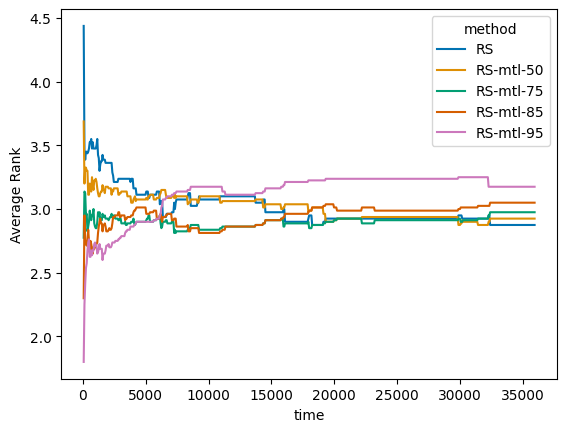

In [ ]:
df_rank = pd.concat(df_final)
df_rank["rank"] = df_rank.groupby(["dataset", "time"])["performance"].rank(ascending=False)
df_av_rank = df_rank.groupby(["time", "method"])["rank"].agg("mean").to_frame("Average Rank").reset_index()

sns.lineplot(data=df_av_rank, x="time", y="Average Rank", hue="method")

<Axes: xlabel='time', ylabel='rank'>

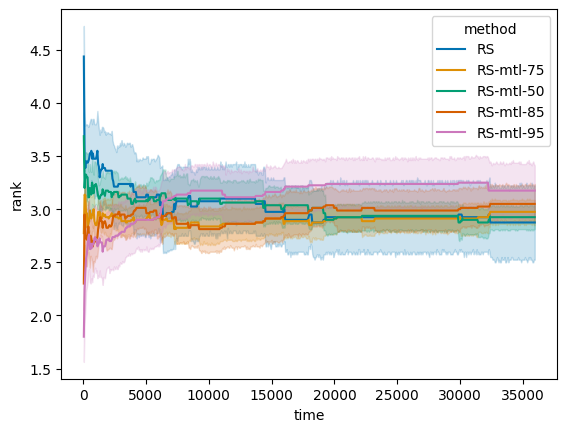

In [ ]:
sns.lineplot(data=df_rank, x="time", y="rank", hue="method")


<Axes: xlabel='time', ylabel='rank'>

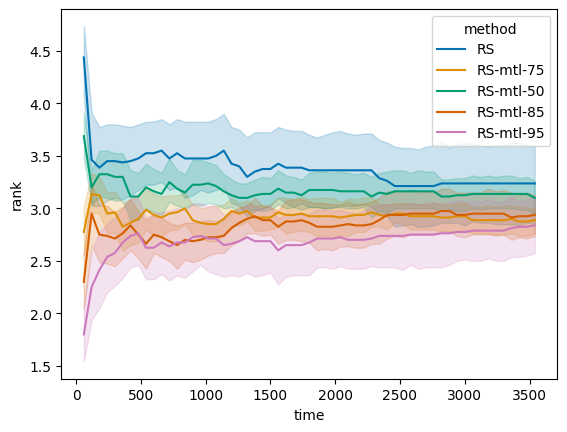

In [ ]:
sns.lineplot(data=df_rank[df_rank["time"] < 3600], x="time", y="rank", hue="method")

In [ ]:
step = 60
a = df_rank[df_rank["time"] == step]

dfss = {}
for i in a["method"].unique():
    dfss[i] = a[a["method"] == i]["performance"].tolist()

pd.DataFrame(dfss).to_csv(f"input-{step}.csv", index=False)

In [ ]:
step = 120
a = df_rank[df_rank["time"] == step]

dfss = {}
for i in a["method"].unique():
    dfss[i] = a[a["method"] == i]["performance"].tolist()

pd.DataFrame(dfss).to_csv(f"input-{step}.csv", index=False)

In [ ]:
 step = 240
a = df_rank[df_rank["time"] == step]

dfss = {}
for i in a["method"].unique():
    dfss[i] = a[a["method"] == i]["performance"].tolist()

pd.DataFrame(dfss).to_csv(f"input-{step}.csv", index=False)

In [ ]:
step = 480
a = df_rank[df_rank["time"] == step]

dfss = {}
for i in a["method"].unique():
    dfss[i] = a[a["method"] == i]["performance"].tolist()

pd.DataFrame(dfss).to_csv(f"input-{step}.csv", index=False)

In [ ]:
step = 600
a = df_rank[df_rank["time"] == step]

dfss = {}
for i in a["method"].unique():
    dfss[i] = a[a["method"] == i]["performance"].tolist()

pd.DataFrame(dfss).to_csv(f"input-{step}.csv", index=False)

In [ ]:
step = 300
a = df_rank[df_rank["time"] == step]

dfss = {}
for i in a["method"].unique():
    dfss[i] = a[a["method"] == i]["performance"].tolist()

pd.DataFrame(dfss).to_csv(f"input-{step}.csv", index=False)

In [ ]:
step = 30000
a = df_rank[df_rank["time"] == step]

dfss = {}
for i in a["method"].unique():
    dfss[i] = a[a["method"] == i]["performance"].tolist()

pd.DataFrame(dfss).to_csv(f"input-{step}.csv", index=False)